# DS53 — Sectoral Dominance Analysis

**Member Assigned:** DE LA ROSA, Nathaniel
**Task Name:** Sectoral Dominance Analysis

## Task Description
Determine which economic sectors dominate regional economies by calculating sectoral shares of total GRDP. Analyze how agriculture, industry, and services contribute to regional output and identify dominant sector patterns.

## Expected Outputs
- Sector share table per region
- Identification of dominant sector per region
- Comparative visualization of sector shares
- Interpretation explaining sector specialization

## Dataset: SECTORAL ECONOMIC STRUCTURE (Sector Level)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Robust BASE_DIR resolution for notebook and script contexts.
try:
    BASE_DIR = Path(__file__).resolve().parents[2]
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / "03_Cleaned_Data").exists():
        BASE_DIR = cwd
    elif (cwd.parent / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parent
    elif len(cwd.parents) > 1 and (cwd.parents[1] / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parents[1]
    else:
        BASE_DIR = cwd.parents[1] if len(cwd.parents) > 1 else cwd

CLEAN_DIR = BASE_DIR / "03_Cleaned_Data"
OUT_TABLES = BASE_DIR / "outputs" / "tables"
OUT_FIGS = BASE_DIR / "outputs" / "figures"

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f"BASE_DIR: {BASE_DIR}")
print(f"CLEAN_DIR exists: {CLEAN_DIR.exists()}")
print(f"OUT_TABLES: {OUT_TABLES}")
print(f"OUT_FIGS: {OUT_FIGS}")

BASE_DIR: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS
CLEAN_DIR exists: True
OUT_TABLES: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables
OUT_FIGS: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\figures


In [18]:
# ==========================================================
# VALIDATION
# ==========================================================
df2 = pd.read_csv(CLEAN_DIR / "Dataset 2 Sector_Economic_Structure (CLEANED).csv")

print("Shape:", df2.shape)
print("Unique Main Sectors:", df2["Main_Sector"].nunique())
print("Year range:", df2["Year"].min(), "-", df2["Year"].max())
print("Price Types:", df2["Price_Type"].unique())

display(df2.head())

Shape: (150, 4)
Unique Main Sectors: 3
Year range: 2000 - 2024
Price Types: <StringArray>
['At Constant 2018 Prices', 'At Current Prices']
Length: 2, dtype: str


,Main_Sector,Year,Price_Type,Total_GRDP
0,"Agriculture, forestry, and fishing",2000,At Constant 2018 Prices,1.045260e+09
1,"Agriculture, forestry, and fishing",2000,At Current Prices,5.051345e+08
2,"Agriculture, forestry, and fishing",2001,At Constant 2018 Prices,1.084420e+09
3,"Agriculture, forestry, and fishing",2001,At Current Prices,5.253688e+08
4,"Agriculture, forestry, and fishing",2002,At Constant 2018 Prices,1.125200e+09


In [19]:
# ==========================================================
# FILTER BY PRICE TYPE
# ==========================================================

df2_constant = df2[df2["Price_Type"] == "At Constant 2018 Prices"].copy()
df2_current = df2[df2["Price_Type"] == "At Current Prices"].copy()

print("Constant Prices Shape:", df2_constant.shape)
print("Current Prices Shape:", df2_current.shape)


Constant Prices Shape: (75, 4)
Current Prices Shape: (75, 4)


In [20]:
# ==========================================================
# CONSTANT PRICES: SECTOR AVERAGE, SECTOR SHARE + RANKING
# ==========================================================
sector_ranking_constant = (
    df2_constant.groupby("Main_Sector", as_index=False)["Total_GRDP"]
    .mean()
    .rename(columns={"Main_Sector": "Sector", "Total_GRDP": "Average_GRDP"})
    .sort_values(by="Average_GRDP", ascending=False)
)
sector_ranking_constant["Sector_Share"] = (sector_ranking_constant["Average_GRDP"] / sector_ranking_constant["Average_GRDP"].sum()) * 100
sector_ranking_constant["Rank"] = range(1, len(sector_ranking_constant) + 1)
sector_ranking_constant = sector_ranking_constant[["Rank", "Sector", "Average_GRDP", "Sector_Share"]]

display(sector_ranking_constant)


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.751614e+09,61.740521
1,2,Industry,4.400322e+09,27.859817
0,3,"Agriculture, forestry, and fishing",1.642576e+09,10.399662


In [21]:
# ==========================================================
# EXPORT CONSTANT PRICES TABLE
# ==========================================================

sector_ranking_constant.to_csv(
    OUT_TABLES / "DS53_sector_ranking_constant_prices.csv",
    index=False
)

print("Saved table:", OUT_TABLES / "DS53_sector_ranking_constant_prices.csv")


Saved table: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables\DS53_sector_ranking_constant_prices.csv


In [22]:
# ==========================================================
# CURRENT PRICES: SECTOR AVERAGE, SECTOR SHARE + RANKING
# ==========================================================
sector_ranking_current = (
    df2_current.groupby("Main_Sector", as_index=False)["Total_GRDP"]
    .mean()
    .rename(columns={"Main_Sector": "Sector", "Total_GRDP": "Average_GRDP"})
    .sort_values(by="Average_GRDP", ascending=False)
)
sector_ranking_current["Sector_Share"] = (sector_ranking_current["Average_GRDP"] / sector_ranking_current["Average_GRDP"].sum()) * 100
sector_ranking_current["Rank"] = range(1, len(sector_ranking_current) + 1)
sector_ranking_current = sector_ranking_current[["Rank", "Sector", "Average_GRDP", "Sector_Share"]]

display(sector_ranking_current)


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.222476e+09,61.828972
1,2,Industry,4.186126e+09,28.064467
0,3,"Agriculture, forestry, and fishing",1.507505e+09,10.106561


In [23]:
# ==========================================================
# EXPORT CURRENT PRICES TABLE
# ==========================================================

sector_ranking_current.to_csv(
    OUT_TABLES / "DS53_sector_ranking_current_prices.csv",
    index=False
)

print("Saved table:", OUT_TABLES / "DS53_sector_ranking_current_prices.csv")


Saved table: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables\DS53_sector_ranking_current_prices.csv


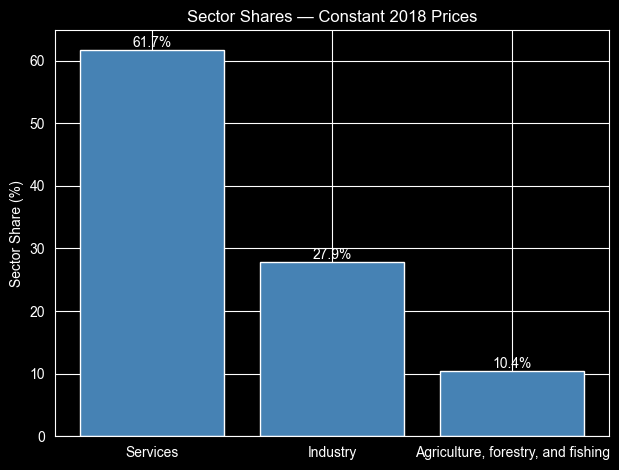

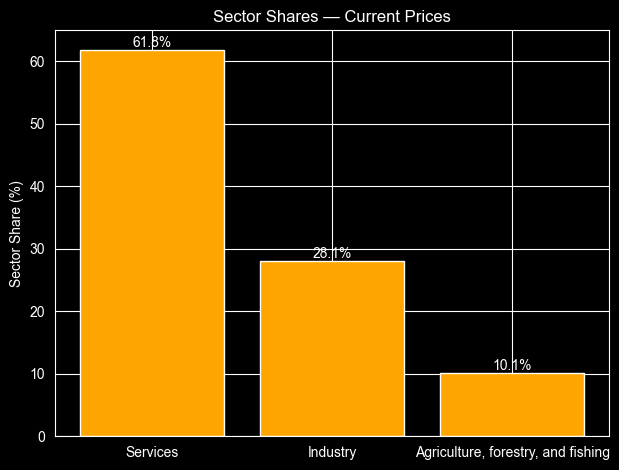

In [24]:
# ==========================================================
# VISUALIZATION: SIMPLE BAR CHARTS WITH PERCENTAGES
# ==========================================================

import matplotlib.pyplot as plt

bars = plt.bar(sector_ranking_constant["Sector"], sector_ranking_constant["Sector_Share"], color='steelblue')
plt.title("Sector Shares — Constant 2018 Prices")
plt.ylabel("Sector Share (%)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.savefig(OUT_FIGS / "DS53_sector_share_constant_prices_bar.png", dpi=300)
plt.show()

bars = plt.bar(sector_ranking_current["Sector"], sector_ranking_current["Sector_Share"], color='orange')
plt.title("Sector Shares — Current Prices")
plt.ylabel("Sector Share (%)")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.savefig(OUT_FIGS / "DS53_sector_share_current_prices_bar.png", dpi=300)
plt.show()
